# SIMPLE LINEAR REGRESSION

## Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading dataset 

In [2]:
df = data("AirPassengers")
df

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


In [3]:
df.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 144
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           144 non-null    float64
 1   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


# Selecting the features, here only one column

In [5]:
x = df[['time']].values

In [6]:
x

array([[1949.        ],
       [1949.08333333],
       [1949.16666667],
       [1949.25      ],
       [1949.33333333],
       [1949.41666667],
       [1949.5       ],
       [1949.58333333],
       [1949.66666667],
       [1949.75      ],
       [1949.83333333],
       [1949.91666667],
       [1950.        ],
       [1950.08333333],
       [1950.16666667],
       [1950.25      ],
       [1950.33333333],
       [1950.41666667],
       [1950.5       ],
       [1950.58333333],
       [1950.66666667],
       [1950.75      ],
       [1950.83333333],
       [1950.91666667],
       [1951.        ],
       [1951.08333333],
       [1951.16666667],
       [1951.25      ],
       [1951.33333333],
       [1951.41666667],
       [1951.5       ],
       [1951.58333333],
       [1951.66666667],
       [1951.75      ],
       [1951.83333333],
       [1951.91666667],
       [1952.        ],
       [1952.08333333],
       [1952.16666667],
       [1952.25      ],
       [1952.33333333],
       [1952.416

# Selecting the target column


In [7]:
y = df[['AirPassengers']].values

In [8]:
sc = StandardScaler()

In [9]:
x = sc.fit_transform(x)

In [10]:
x

array([[-1.72006415],
       [-1.69600731],
       [-1.67195047],
       [-1.64789363],
       [-1.62383679],
       [-1.59977995],
       [-1.5757231 ],
       [-1.55166626],
       [-1.52760942],
       [-1.50355258],
       [-1.47949574],
       [-1.4554389 ],
       [-1.43138206],
       [-1.40732522],
       [-1.38326837],
       [-1.35921153],
       [-1.33515469],
       [-1.31109785],
       [-1.28704101],
       [-1.26298417],
       [-1.23892733],
       [-1.21487049],
       [-1.19081364],
       [-1.1667568 ],
       [-1.14269996],
       [-1.11864312],
       [-1.09458628],
       [-1.07052944],
       [-1.0464726 ],
       [-1.02241576],
       [-0.99835891],
       [-0.97430207],
       [-0.95024523],
       [-0.92618839],
       [-0.90213155],
       [-0.87807471],
       [-0.85401787],
       [-0.82996102],
       [-0.80590418],
       [-0.78184734],
       [-0.7577905 ],
       [-0.73373366],
       [-0.70967682],
       [-0.68561998],
       [-0.66156314],
       [-0

In [11]:
y

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

# Splitting into training and testing data 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Model building

In [13]:
model = LinearRegression()

# Fitting the model

In [14]:
model.fit(x_train, y_train)

LinearRegression()

# Coefficient

In [15]:
model.coef_

array([[106.64683996]])

# intercept


In [16]:
model.intercept_


array([277.27780117])

# Training accuracy

In [17]:
training_score = model.score(x_train, y_train)*100
training_score

84.9199944225992

# testing accuracy

In [18]:
testing_score = model.score(x_test, y_test)*100
testing_score

85.78393760119663

# R2 score

In [19]:
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

85.78393760119663

# Mean Absolute Error

In [20]:
m = mean_absolute_error(y_test, model.predict(x_test))
m

37.5291766044347

# Mean squared error

In [21]:
mse = mean_squared_error(y_test, model.predict(x_test))
mse

2558.8192217657975

# predicting values

In [22]:
y_pred = model.predict(x)

In [23]:
y_pred

array([[ 93.83839475],
       [ 96.40398085],
       [ 98.96956696],
       [101.53515306],
       [104.10073917],
       [106.66632527],
       [109.23191137],
       [111.79749748],
       [114.36308358],
       [116.92866968],
       [119.49425579],
       [122.05984189],
       [124.625428  ],
       [127.1910141 ],
       [129.7566002 ],
       [132.32218631],
       [134.88777241],
       [137.45335851],
       [140.01894462],
       [142.58453072],
       [145.15011683],
       [147.71570293],
       [150.28128903],
       [152.84687514],
       [155.41246124],
       [157.97804734],
       [160.54363345],
       [163.10921955],
       [165.67480566],
       [168.24039176],
       [170.80597786],
       [173.37156397],
       [175.93715007],
       [178.50273617],
       [181.06832228],
       [183.63390838],
       [186.19949449],
       [188.76508059],
       [191.33066669],
       [193.8962528 ],
       [196.4618389 ],
       [199.027425  ],
       [201.59301111],
       [204

# creating a DataFrame with actual value and predicted value inorder nto compare them

In [24]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns = ("ACTUAL","PREDICTED"), dtype = float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,112.0,93.838395
1,118.0,96.403981
2,132.0,98.969567
3,129.0,101.535153
4,121.0,104.100739


# Visualising the output

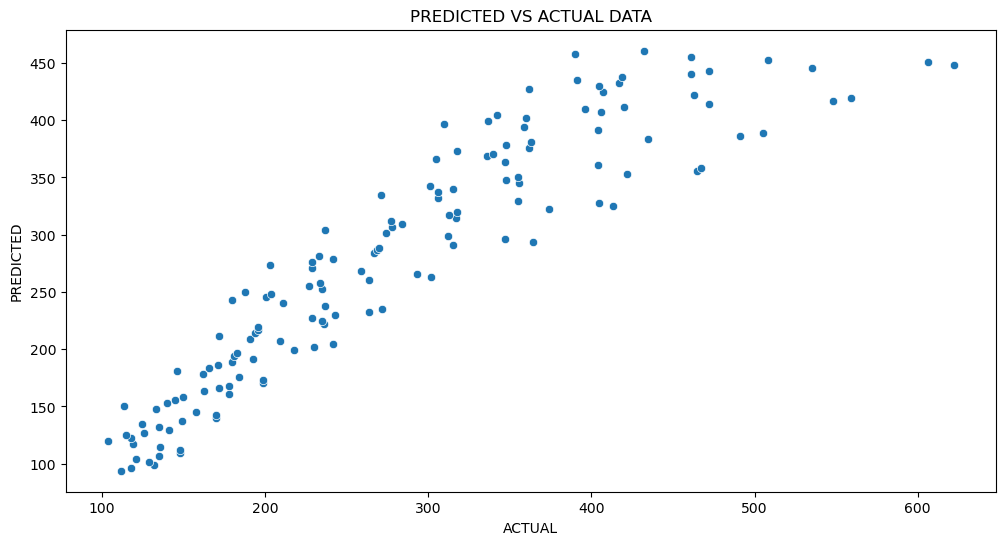

In [27]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED");

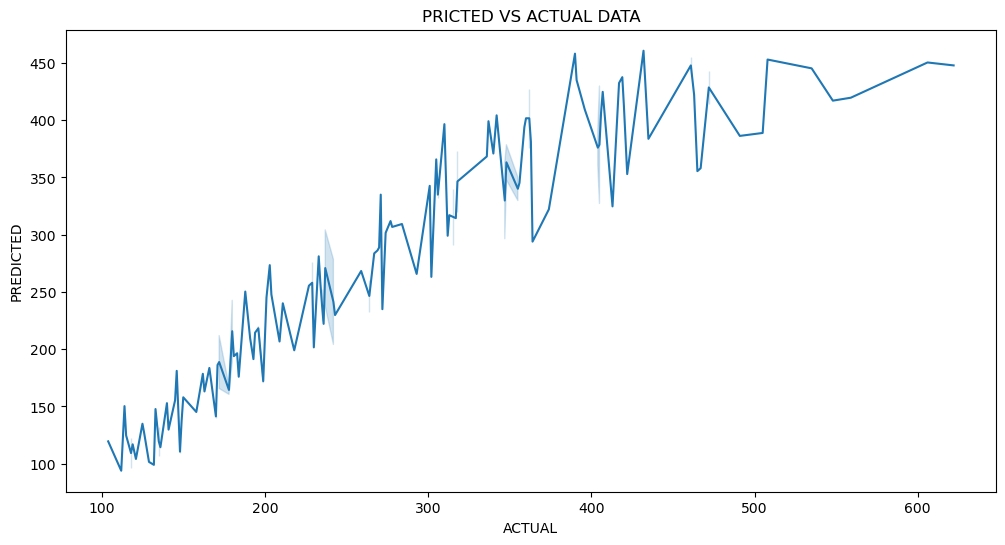